In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import glob

# Combine the data and load the data

In [45]:
all_files = glob.glob("*.csv")

In [46]:
all_files

['City_Zhvi_1bedroom.csv',
 'City_Zhvi_2bedroom.csv',
 'City_Zhvi_3bedroom.csv',
 'City_Zhvi_4bedroom.csv',
 'City_Zhvi_5BedroomOrMore.csv']

In [48]:
hs = pd.concat(pd.read_csv(f) for f in all_files)

In [51]:
hs.head()

,Unnamed: 0,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,139028.0,...,606162.0,604457.0,603126.0,601368.0,600138.0,598527.0,597268.0,597019.0,596725.0,596432.0
1,1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,114152.0,...,531014.0,530916.0,530814.0,531586.0,533161.0,534943.0,537784.0,541161.0,546048.0,550710.0
2,2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,68246.0,...,104937.0,105155.0,105502.0,105618.0,106083.0,106186.0,106299.0,106161.0,106271.0,106635.0
3,3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,95803.0,...,238850.0,239106.0,239230.0,239070.0,238942.0,238700.0,238530.0,238580.0,239266.0,240143.0
4,4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,55420.0,...,90717.0,91135.0,91256.0,91958.0,92577.0,93383.0,93500.0,93963.0,94115.0,94557.0


In [50]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106291 entries, 0 to 18769
Columns: 300 entries, Unnamed: 0 to 2020-03-31
dtypes: float64(291), int64(3), object(6)
memory usage: 244.1+ MB


#create the dataframe for Texas and California 

In [255]:
hs_tx = hs[hs.StateName=='TX']
hs_tx

,Unnamed: 0,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
2,2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,68246.0,...,104937.0,105155.0,105502.0,105618.0,106083.0,106186.0,106299.0,106161.0,106271.0,106635.0
4,4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,55420.0,...,90717.0,91135.0,91256.0,91958.0,92577.0,93383.0,93500.0,93963.0,94115.0,94557.0
9,9,38128,9,Dallas,City,TX,TX,Dallas-Fort Worth-Arlington,Dallas County,81895.0,...,127201.0,128243.0,129296.0,131491.0,133499.0,135324.0,135456.0,135102.0,134699.0,135080.0
10,10,10221,10,Austin,City,TX,TX,Austin-Round Rock,Travis County,134343.0,...,264684.0,265207.0,265589.0,266687.0,267187.0,268417.0,268891.0,269627.0,269656.0,270911.0
16,16,18172,16,Fort Worth,City,TX,TX,Dallas-Fort Worth-Arlington,Tarrant County,94454.0,...,168865.0,169324.0,170025.0,170136.0,169141.0,167850.0,167262.0,167579.0,168277.0,169143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18708,18708,13442,29449,Ransom Canyon,City,TX,TX,Lubbock,Lubbock County,NaN,...,385333.0,387468.0,387514.0,389938.0,391649.0,397571.0,404642.0,411867.0,416187.0,420871.0
18722,18722,52665,29449,Jamaica Beach,City,TX,TX,Houston-The Woodlands-Sugar Land,Galveston County,NaN,...,656209.0,656624.0,655992.0,656511.0,655356.0,656806.0,655688.0,655114.0,652268.0,649370.0
18723,18723,32151,29449,Ingleside on the Bay,City,TX,TX,Corpus Christi,San Patricio County,NaN,...,257179.0,258419.0,259467.0,259902.0,260406.0,261622.0,263336.0,264974.0,266138.0,268114.0
18726,18726,54635,29449,Surfside Beach,City,TX,TX,Houston-The Woodlands-Sugar Land,Brazoria County,NaN,...,457049.0,456514.0,456555.0,458114.0,462450.0,466920.0,472154.0,476587.0,480253.0,482405.0


In [213]:
hs_ca = hs[hs.StateName=='CA']
hs_ca

,Unnamed: 0,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
1,1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,114152.0,...,531014.0,530916.0,530814.0,531586.0,533161.0,534943.0,537784.0,541161.0,546048.0,550710.0
8,8,54296,8,San Diego,City,CA,CA,San Diego-Carlsbad,San Diego County,96046.0,...,348972.0,349970.0,350703.0,351550.0,352218.0,353611.0,355414.0,358047.0,360170.0,362504.0
11,11,33839,11,San Jose,City,CA,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,127479.0,...,576643.0,569030.0,565739.0,565805.0,566135.0,567223.0,570537.0,576803.0,583254.0,589553.0
14,14,20330,14,San Francisco,City,CA,CA,San Francisco-Oakland-Hayward,San Francisco County,235190.0,...,919166.0,919915.0,918570.0,921310.0,926650.0,933878.0,944351.0,949029.0,953977.0,955703.0
30,30,20288,30,Sacramento,City,CA,CA,Sacramento--Roseville--Arden-Arcade,Sacramento County,71359.0,...,247408.0,247698.0,249219.0,251353.0,253045.0,254379.0,255571.0,257730.0,259820.0,262387.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18570,18570,118160,29426,Soda Springs,City,CA,CA,Sacramento--Roseville--Arden-Arcade,Placer County,417069.0,...,880263.0,885576.0,892822.0,898761.0,906633.0,910410.0,916152.0,918214.0,922041.0,929601.0
18572,18572,48066,29446,Twin Bridges,City,CA,CA,Sacramento--Roseville--Arden-Arcade,El Dorado County,NaN,...,621504.0,627238.0,632187.0,639499.0,647882.0,652568.0,654164.0,653090.0,654456.0,657566.0
18645,18645,8442,29449,Kirkwood,City,CA,CA,NaN,Alpine County,NaN,...,1289501.0,1286438.0,1287810.0,1289597.0,1288851.0,1285685.0,1281052.0,1277537.0,1274183.0,1271306.0
18673,18673,23633,29449,Bear Valley,City,CA,CA,NaN,Alpine County,NaN,...,612352.0,612339.0,611694.0,611659.0,609011.0,609256.0,609324.0,609823.0,609940.0,611671.0


In [257]:
#check the sample size of both data
print(len(hs_tx))
print(len(hs_ca))

4825
4852


Now we have the dataset and enough sample size for Hypothesis 1

# Hypothesis 1:
H0: In March 2020, there is no significant difference between the overall housing price in California and that in Texas

Ha: In March 2020, there is significant difference between the overall housing price in California and that in Texas

In [59]:
hs_tx_202003 = hs[hs['StateName']=='TX']['2020-03-31']

In [60]:
hs_ca_202003 = hs[hs['StateName']=='CA']['2020-03-31']

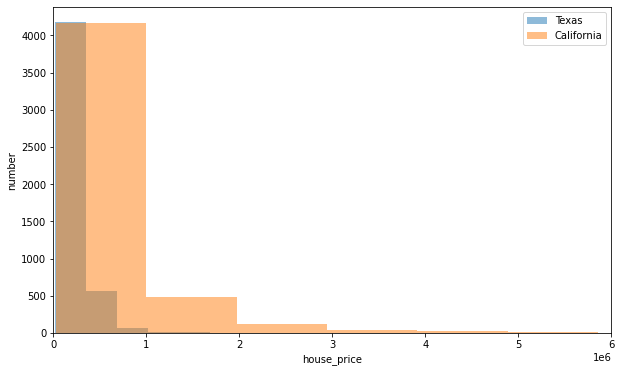

In [295]:
plt.figure(figsize=(10, 6))
hs_tx_2020 = plt.hist(hs_tx_202003, alpha = 0.5)
hs_ca_2020 = plt.hist(hs_ca_202003, alpha = 0.5)
plt.legend(['Texas', 'California'])
plt.xlim([0, 0.6e7])
plt.xlabel('house_price')
plt.ylabel('number')
plt.show()

From the plot, it looks like both data is not normal distribution. Let's confirm it with skewness and Kurtosis

In [72]:
print(stats.describe(hs_tx_202003))
print(stats.describe(hs_tx_202003))

DescribeResult(nobs=4825, minmax=(20104.0, 3338751.0), mean=221665.36808290155, variance=30635731783.745083, skewness=4.92193980686524, kurtosis=49.652421194261365)
DescribeResult(nobs=4825, minmax=(20104.0, 3338751.0), mean=221665.36808290155, variance=30635731783.745083, skewness=4.92193980686524, kurtosis=49.652421194261365)


It confirms that the two distribution are not normally distributed. So we will need to use Kruskal-Wallis test method

In [74]:
stats.kruskal(hs_tx_202003, hs_ca_202003 )

KruskalResult(statistic=3223.527698137468, pvalue=0.0)

From this test statistic, we can reject the null hypothesis (In March 2020, there is no significant difference between the overall housing price in California and that in Texas)

That's to say, In March 2020, there is significant difference between the overall housing price in California and that in Texas. 

Let's use the boxplot to better view the difference

(0.0, 2000000.0)

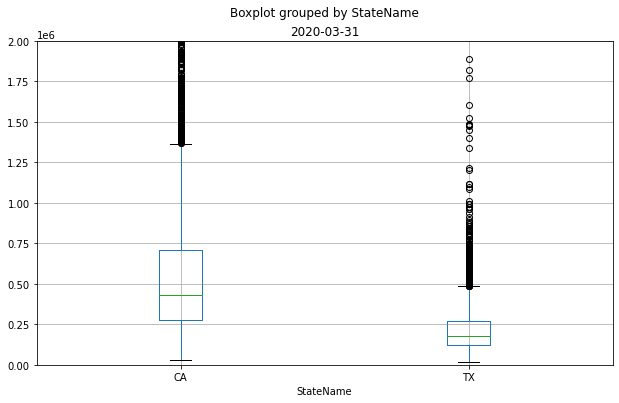

In [318]:
filter_list = ['TX', 'CA']
hs_tx_ca = hs[hs['StateName'].isin(filter_list)]
hs_tx_ca.boxplot('2020-03-31', by='StateName', figsize = (10, 6))
plt.ylim(0, 0.2e7)

The housing price of California is higher than Texas, if someone still want to move to California and need to decide where/in which county to buy a house, it might be helpful to know a bit more about the counties, such as the counties with max/min/median house price in CA. 

# Find the counties with max/min/median house price

In [91]:
#check how many counties in CA
print('Total counties in CA:', len(hs[hs['StateName']=='CA']['CountyName'].unique()))

Total counties in CA: 58


In [114]:
#Group the data in March 2020 in California by county and get the median 
#house price of that county
hs_ca_county=hs[hs['StateName']=='CA'].groupby('CountyName').agg(['mean'])['2020-03-31']

In [117]:
stats.describe(hs_ca_county['mean'])

DescribeResult(nobs=58, minmax=(164008.6739130435, 1901751.6615384615), mean=548743.0142466297, variance=166164449454.31485, skewness=1.7573822748384211, kurtosis=2.57377795922001)

array([[<AxesSubplot:title={'center':'mean'}>]], dtype=object)

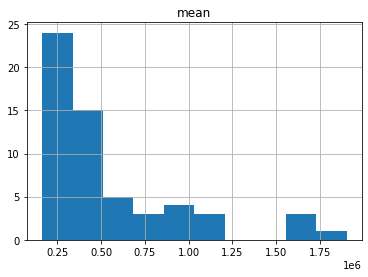

In [118]:
hs_ca_county.hist()

In [209]:
#check the min/max/median mean house prices in the counties in CA
hs_ca_county_min = hs_ca_county.min()['mean']
hs_ca_county_max = hs_ca_county.max()['mean']
hs_ca_county_median = hs_ca_county.median()['mean']
print(hs_ca_county_min,hs_ca_county_max,hs_ca_county_median)

164008.6739130435 1901751.6615384615 383320.1449683155


In [208]:
for index, row in hs_ca_county.iterrows():
    if row['mean'] == hs_ca_county_min:
        print('the county with min mean house price in CA is: ', index, ', and the price is: ', row['mean'])
    elif row['mean'] == hs_ca_county_max:
        print('the county with max mean house price in CA is: ', index, ', and the price is: ', row['mean'])
    elif int(row['mean']) in range (int(hs_ca_county_median) - 10000, int(hs_ca_county_median)):
        print('the county with median mean house price in CA is: ', index, ', and the price is: ', row['mean'])    

the county with median mean house price in CA is:  Humboldt County , and the price is:  373445.175257732
the county with min mean house price in CA is:  Modoc County , and the price is:  164008.6739130435
the county with max mean house price in CA is:  San Mateo County , and the price is:  1901751.6615384615


Depends on individuals own situations and financial situation, they can have a rough idea about where to move and the house price they would expect. 

# Hypothesis 2:
H0: For the housing price in California, there is no significant difference of  the housing price between the year of 2010 and 2020. 

Ha: For the housing price in California, there is significant difference of  the housing price between the year of 2010 and 2020. 

In [246]:
hs_ca_201003 = hs_ca['2010-03-31']

In [317]:
#check if there's NA values
hs_ca_201003.isnull().sum()

0

In [248]:
#drop the NA value
hs_ca_201003 = hs_ca_201003.dropna()

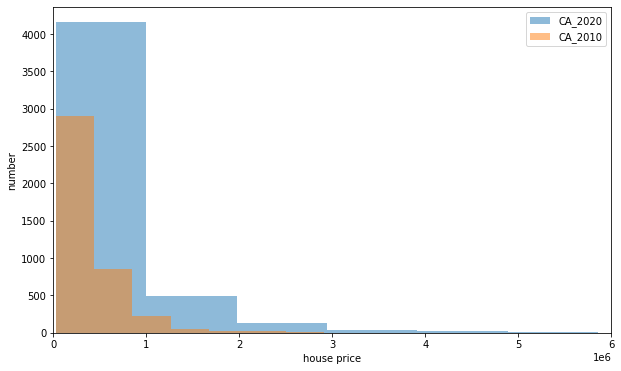

In [294]:
plt.figure(figsize=(10, 6))
hs_ca_2020 = plt.hist(hs_ca_202003, alpha = 0.5)
hs_ca_2010 = plt.hist(hs_ca_201003, alpha = 0.5)
plt.legend(['CA_2020', 'CA_2010'])
plt.xlabel('house price')
plt.ylabel('number')
plt.xlim(0, 0.6e7)
plt.show()

From the plot, it looks like both data is not normal distribution. Let's confirm it with skewness and Kurtosis

In [251]:
print(stats.describe(hs_ca_202003))
print(stats.describe(hs_ca_201003))

DescribeResult(nobs=4852, minmax=(29232.0, 9737475.0), mean=628950.9291014015, variance=443263913057.3271, skewness=4.1208854203896985, kurtosis=27.72645047650439)
DescribeResult(nobs=4092, minmax=(26043.0, 4143559.0), mean=396331.88123167155, variance=129783536931.40216, skewness=3.199715915890127, kurtosis=16.31540254656679)


It confirms that the data are not normally distributed. We will use Kruskal-Wallis test method

In [252]:
stats.kruskal(hs_ca_202003, hs_ca_201003)

KruskalResult(statistic=647.7583449684015, pvalue=6.864805713700793e-143)

It seems that we can reject the null hypothesis (For the housing price in California, there is no significant difference of the housing price between the year of 2010 and 2020). 

That is to say, for the housing price in California, there is significant difference of the housing price between the year of 2010 and 2020

(0.0, 2000000.0)

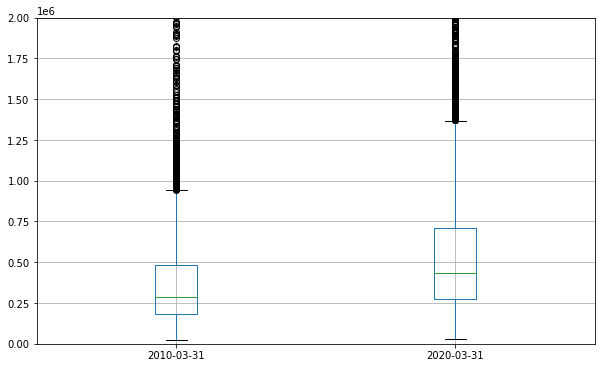

In [325]:
hs_ca.boxplot(column = ['2010-03-31', '2020-03-31'], figsize = (10, 6))
plt.ylim(0, 0.2e7)

Let's take a look at the plot of the mean house price in CA during the past 15 years

In [298]:
hs_ca_mean = hs_ca.mean()

C:\Users\zhang\AppData\Local\Temp/ipykernel_16224/3287604123.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hs_ca_mean = hs_ca.mean()


In [315]:
#only interested in columns of house price from 1996-2020
hs_ca_mean2 = hs_ca_mean.iloc[3:]

In [321]:
#convert the year/month info from string to datetime
hs_ca_mean2.index = pd.to_datetime(hs_ca_mean2.index)

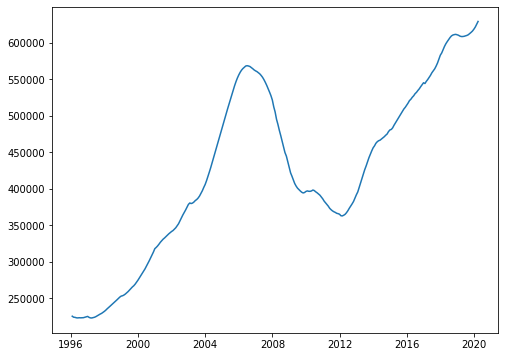

In [324]:
plt.figure(figsize = (8,6))
plt.plot(hs_ca_mean2)

From the plot, we can see over the past 15 years, the house price is overall increased (although a bit droping from 2008 - 2012). If this trend is contined, people who move to CA and plan to buy a house, should buy it sooner before it continues to increase. 

In [334]:
objects = ('min', 'median', 'max')
y_pos = (1.640087e+05, 3.833201e+05, 1.901752e+06)

Text(0, 0.5, 'mean house price in CA (Mar 2020)')

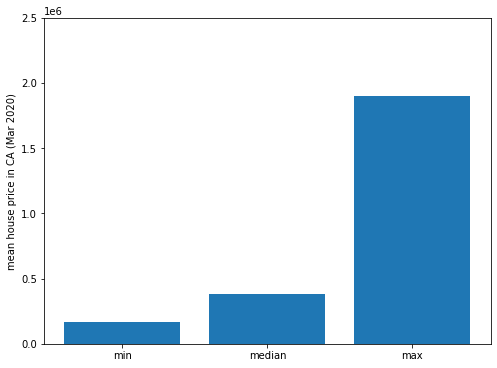

In [345]:
plt.figure(figsize = (8,6))
plt.bar(objects, y_pos, align='center')
plt.ylim(0, 2.5e6)
plt.ylabel('mean house price in CA (Mar 2020)')

In [352]:
pd.concat([hs_ca_202003, hs_tx_202003])

1        550710.0
8        362504.0
11       589553.0
14       955703.0
30       262387.0
           ...   
18708    420871.0
18722    649370.0
18723    268114.0
18726    482405.0
18750    384703.0
Name: 2020-03-31, Length: 9677, dtype: float64

In [349]:
hs_ca = hs[hs.StateName=='CA']
hs_tx = hs[hs.StateName=='TX']

In [361]:
data_ptplt=pd.concat([hs_ca, hs_tx])
data_ptplt

,Unnamed: 0,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
1,1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,114152.0,...,531014.0,530916.0,530814.0,531586.0,533161.0,534943.0,537784.0,541161.0,546048.0,550710.0
8,8,54296,8,San Diego,City,CA,CA,San Diego-Carlsbad,San Diego County,96046.0,...,348972.0,349970.0,350703.0,351550.0,352218.0,353611.0,355414.0,358047.0,360170.0,362504.0
11,11,33839,11,San Jose,City,CA,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,127479.0,...,576643.0,569030.0,565739.0,565805.0,566135.0,567223.0,570537.0,576803.0,583254.0,589553.0
14,14,20330,14,San Francisco,City,CA,CA,San Francisco-Oakland-Hayward,San Francisco County,235190.0,...,919166.0,919915.0,918570.0,921310.0,926650.0,933878.0,944351.0,949029.0,953977.0,955703.0
30,30,20288,30,Sacramento,City,CA,CA,Sacramento--Roseville--Arden-Arcade,Sacramento County,71359.0,...,247408.0,247698.0,249219.0,251353.0,253045.0,254379.0,255571.0,257730.0,259820.0,262387.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18708,18708,13442,29449,Ransom Canyon,City,TX,TX,Lubbock,Lubbock County,NaN,...,385333.0,387468.0,387514.0,389938.0,391649.0,397571.0,404642.0,411867.0,416187.0,420871.0
18722,18722,52665,29449,Jamaica Beach,City,TX,TX,Houston-The Woodlands-Sugar Land,Galveston County,NaN,...,656209.0,656624.0,655992.0,656511.0,655356.0,656806.0,655688.0,655114.0,652268.0,649370.0
18723,18723,32151,29449,Ingleside on the Bay,City,TX,TX,Corpus Christi,San Patricio County,NaN,...,257179.0,258419.0,259467.0,259902.0,260406.0,261622.0,263336.0,264974.0,266138.0,268114.0
18726,18726,54635,29449,Surfside Beach,City,TX,TX,Houston-The Woodlands-Sugar Land,Brazoria County,NaN,...,457049.0,456514.0,456555.0,458114.0,462450.0,466920.0,472154.0,476587.0,480253.0,482405.0


In [357]:
import seaborn as sns

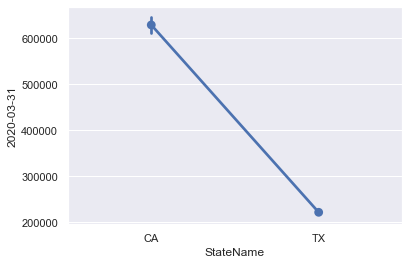

In [358]:
sns.set_theme(style='darkgrid')
ax = sns.pointplot(x='StateName', y='2020-03-31', data=data_ptplt)

In [383]:
aaa = pd.DataFrame(hs_ca_202003)

In [385]:
aaa.columns=['time']

In [387]:
aaa['year']='2020'

In [388]:
aaa

,time,year
1,550710.0,2020
8,362504.0,2020
11,589553.0,2020
14,955703.0,2020
30,262387.0,2020
...,...,...
18570,929601.0,2020
18572,657566.0,2020
18645,1271306.0,2020
18673,611671.0,2020


In [389]:
bbb=pd.DataFrame(hs_ca_201003)

In [390]:
bbb.columns=['time']

In [391]:
bbb['year']='2010'

In [392]:
bbb

,time,year
1,314395.0,2010
8,210227.0,2010
11,296775.0,2010
14,566667.0,2010
30,116363.0,2010
...,...,...
18570,795658.0,2010
18572,704987.0,2010
18645,774683.0,2010
18673,409102.0,2010


In [399]:
ccc = pd.concat([bbb, aaa])

<AxesSubplot:xlabel='year', ylabel='time'>

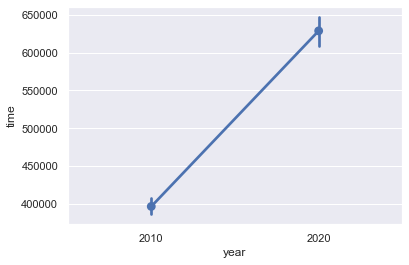

In [400]:
sns.pointplot(x='year', y='time', data=ccc)

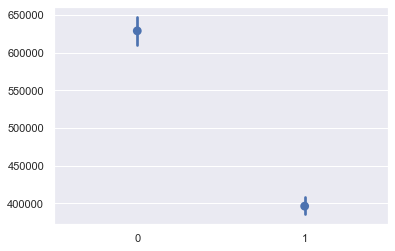

In [402]:
g = sns.pointplot(data = [hs_ca['2020-03-31'], hs_ca['2010-03-31']], join=False)

In [ ]:
stats.ttest_ind()